In [1]:
%cd ..

from nsopy_stoch.benchmark_problems.generate_caroe_schultz_datasets import generate_caroe_schultz_cor_file
from nsopy_stoch.benchmark_problems.generate_caroe_schultz_datasets import generate_caroe_schultz_sto_and_tim_files

C:\Users\vujanicr\PycharmProjects\nsopy_stoch


# Examine the norm of dual optimizers and convergence rates @ different $|S|$

In [2]:
from nsopy.subgradient_methods import SubgradientMethod as SG
from nsopy.universal_gradient_methods import UniversalPGM, OneNormUPGM
from nsopy.quasi_monotone_subgradient_methods import SGMTripleAveraging as TA
from nsopy.method_loggers import EnhancedDualMethodLogger
from nsopy_stoch.oracles import TwoStage_SMPS_InnerProblem

In [3]:
# Setup

BENCHMARKS_PATH = './nsopy_stoch/benchmark_problems/2_caroe_schultz/'

n_S_exp = [10, 50, 100, 500, 1000]
GAMMA_0_TA = 0.1

In [4]:
# Generate IP and all methods

inner_problems = []
methods = []
methods_nonscaled = []
method_loggers = []
method_loggers_nonscaled = []

for n_S in n_S_exp: # [100, ]: 
    ip = TwoStage_SMPS_InnerProblem(BENCHMARKS_PATH+'caroe_schultz_{}'.format(n_S))
    inner_problems.append(ip)
    
#     upgm = UniversalPGM(oracle=ip.oracle, projection_function=ip.projection_function, dimension=ip.dimension)
#     one_norm_upgm = OneNormUPGM(oracle=ip.oracle, projection_function=ip.projection_function, dimension=ip.dimension)
    ta = TA(oracle=ip.oracle, projection_function=ip.projection_function, dimension=ip.dimension, gamma=GAMMA_0_TA*n_S)
    ta_nonscale_stepsize = TA(oracle=ip.oracle, projection_function=ip.projection_function, dimension=ip.dimension, gamma=GAMMA_0_TA)
    
#     logger_upgm = EnhancedDualMethodLogger(upgm)
#     logger_one_norm_upgm = EnhancedDualMethodLogger(one_norm_upgm)
    logger_ta = EnhancedDualMethodLogger(ta)
    logger_ta_nonscaled = EnhancedDualMethodLogger(ta_nonscale_stepsize)

#     methods.append(upgm)
#     methods.append(one_norm_upgm)
    methods.append(ta)
    methods_nonscaled.append(ta_nonscale_stepsize)

#     method_loggers.append(logger_upgm)
#     method_loggers.append(logger_one_norm_upgm)
    method_loggers.append(logger_ta)
    method_loggers_nonscaled.append(logger_ta_nonscaled)

Parsing nominal model information from ./nsopy_stoch/benchmark_problems/2_caroe_schultz/caroe_schultz_10.cor and .tim ...
Parsing stochastic information from ./nsopy_stoch/benchmark_problems/2_caroe_schultz/caroe_schultz_10.sto ...
Stochastic model is of type SCENARIOS DISCRETE
Parsing nominal model information from ./nsopy_stoch/benchmark_problems/2_caroe_schultz/caroe_schultz_50.cor and .tim ...
Parsing stochastic information from ./nsopy_stoch/benchmark_problems/2_caroe_schultz/caroe_schultz_50.sto ...
Stochastic model is of type SCENARIOS DISCRETE
Parsing nominal model information from ./nsopy_stoch/benchmark_problems/2_caroe_schultz/caroe_schultz_100.cor and .tim ...
Parsing stochastic information from ./nsopy_stoch/benchmark_problems/2_caroe_schultz/caroe_schultz_100.sto ...
Stochastic model is of type SCENARIOS DISCRETE
Parsing nominal model information from ./nsopy_stoch/benchmark_problems/2_caroe_schultz/caroe_schultz_500.cor and .tim ...
Parsing stochastic information from ./

In [5]:
for method in methods:
    for step in range(1000):
        if not step % 100:
            print('step: '+str(step)+' of method'+str(method))
        method.dual_step()

for method in methods_nonscaled:
    for step in range(1000):
        if not step % 100:
            print('step: '+str(step)+' of (nonscaled) method'+str(method))
        method.dual_step()


step: 0 of method<nsopy.quasi_monotone_subgradient_methods.SGMTripleAveraging object at 0x0000000008352780>
step: 100 of method<nsopy.quasi_monotone_subgradient_methods.SGMTripleAveraging object at 0x0000000008352780>
step: 200 of method<nsopy.quasi_monotone_subgradient_methods.SGMTripleAveraging object at 0x0000000008352780>
step: 300 of method<nsopy.quasi_monotone_subgradient_methods.SGMTripleAveraging object at 0x0000000008352780>
step: 400 of method<nsopy.quasi_monotone_subgradient_methods.SGMTripleAveraging object at 0x0000000008352780>
step: 500 of method<nsopy.quasi_monotone_subgradient_methods.SGMTripleAveraging object at 0x0000000008352780>
step: 600 of method<nsopy.quasi_monotone_subgradient_methods.SGMTripleAveraging object at 0x0000000008352780>
step: 700 of method<nsopy.quasi_monotone_subgradient_methods.SGMTripleAveraging object at 0x0000000008352780>
step: 800 of method<nsopy.quasi_monotone_subgradient_methods.SGMTripleAveraging object at 0x0000000008352780>
step: 900 of

In [6]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

In [8]:
# small hack to find d*
d_stars = []

# STANDARD
# for method_logger in method_loggers:
#     d_stars.append(max(method_logger.d_k_iterates))
    
# Scaled vs NONSCALED
for logger_ix, method_logger in enumerate(method_loggers):
    d_stars.append(max(max(method_loggers[logger_ix].d_k_iterates), max(method_loggers_nonscaled[logger_ix].d_k_iterates)))
    
# Version where I compare UPGM with 1-norm UPGM
# # 10
# ds = max(max(method_loggers[0].d_k_iterates), max(method_loggers[1].d_k_iterates))
# d_stars.append(ds)
# d_stars.append(ds)

# # 50
# ds = max(max(method_loggers[2].d_k_iterates), max(method_loggers[3].d_k_iterates))
# d_stars.append(ds)
# d_stars.append(ds)

# # 100
# ds = max(max(method_loggers[4].d_k_iterates), max(method_loggers[5].d_k_iterates))
# d_stars.append(ds)
# d_stars.append(ds)

In [9]:
d_stars

[-54.80399421385207,
 -59.79465775324058,
 -62.1034041771558,
 -59.46923408132586,
 -48.854893465453756]

<IPython.core.display.Javascript object>


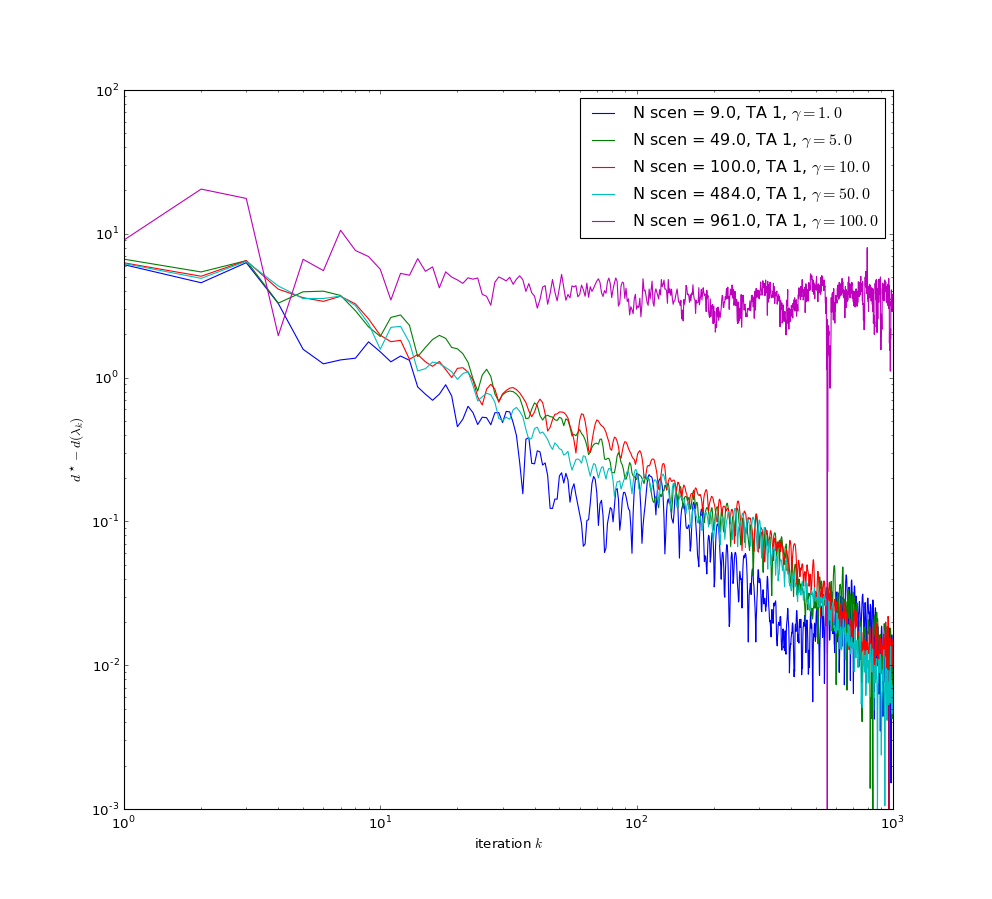

In [10]:
# PLOT PROGRESS OF METHODS
plt.figure(facecolor='w')
for logger_ix, logger in enumerate(method_loggers):
#     plt.plot(logger.oracle_calls, logger.d_k_iterates, 
#              label='N scen = {}, {}'.format(methods[logger_ix].dimension/2, methods[logger_ix].desc))
#     plt.plot(logger.oracle_calls, [d_stars[logger_ix] - item for item in logger.d_k_iterates], 
#              label='N scen = {}, {}'.format(methods[logger_ix].dimension/2, methods[logger_ix].desc))

    plt.loglog([call for call in logger.oracle_calls], [d_stars[logger_ix] - item + 0.001 for item in logger.d_k_iterates], 
               label='N scen = {}, {}'.format(float(methods[logger_ix].dimension)/2.0, methods[logger_ix].desc))
#     plt.loglog([call+1 for call in logger.oracle_calls], [-item for item in logger.d_k_iterates], 
#                label='N scen = {}'.format(n_S_exp[logger_ix]))
#     plt.loglog([call+1 for call in logger.oracle_calls], [-item for item in logger.d_k_iterates], 
#                label='N scen = {}, {}'.format(methods[logger_ix].dimension/2, methods[logger_ix].desc))


    
# # PLOT UPPER BOUND
# INSTANCE = 6
# GAMMA = 1.0
# P_MAX_UB = 0
# D_0 = method_loggers[INSTANCE].d_k_iterates[0]
# RHO = 2.5
# DIAM_X_SQR = 50
# R_D = float(P_MAX_UB - D_0)/float(RHO)

# upper_bound = [-method_loggers[INSTANCE].d_k_iterates[-1] + 1.0/np.sqrt(1+k)*(2*GAMMA*R_D*R_D + 1.0/(float(GAMMA))*DIAM_X_SQR) for k in method_loggers[0].oracle_calls]

# Plot stuff
# plt.loglog([call+1 for call in method_loggers[0].oracle_calls], upper_bound, label='Uppber bound (N={})'.format(n_S_exp[INSTANCE]))
plt.xlabel('iteration $k$')
plt.ylabel('$d^\star - d(\lambda_k)$')
plt.legend()

<IPython.core.display.Javascript object>


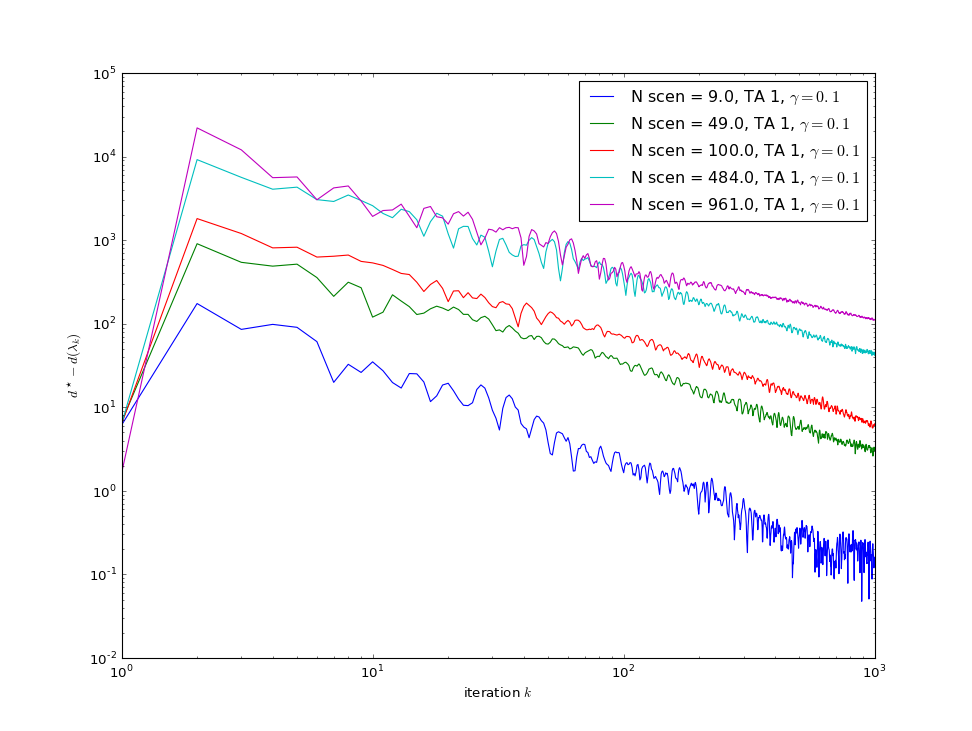

In [12]:
# PLOT PROGRESS OF METHODS
plt.figure(facecolor='w')
for logger_ix, logger in enumerate(method_loggers_nonscaled):
#     plt.plot(logger.oracle_calls, logger.d_k_iterates, 
#              label='N scen = {}, {}'.format(methods[logger_ix].dimension/2, methods[logger_ix].desc))
#     plt.plot(logger.oracle_calls, [d_stars[logger_ix] - item for item in logger.d_k_iterates], 
#              label='N scen = {}, {}'.format(methods[logger_ix].dimension/2, methods[logger_ix].desc))

    plt.loglog([call for call in logger.oracle_calls], [d_stars[logger_ix] - item + 0.001 for item in logger.d_k_iterates], 
               label='N scen = {}, {}'.format(float(methods[logger_ix].dimension)/2.0, methods_nonscaled[logger_ix].desc))
#     plt.loglog([call+1 for call in logger.oracle_calls], [-item for item in logger.d_k_iterates], 
#                label='N scen = {}'.format(n_S_exp[logger_ix]))
#     plt.loglog([call+1 for call in logger.oracle_calls], [-item for item in logger.d_k_iterates], 
#                label='N scen = {}, {}'.format(methods[logger_ix].dimension/2, methods[logger_ix].desc))


    
# # PLOT UPPER BOUND
# INSTANCE = 6
# GAMMA = 1.0
# P_MAX_UB = 0
# D_0 = method_loggers[INSTANCE].d_k_iterates[0]
# RHO = 2.5
# DIAM_X_SQR = 50
# R_D = float(P_MAX_UB - D_0)/float(RHO)

# upper_bound = [-method_loggers[INSTANCE].d_k_iterates[-1] + 1.0/np.sqrt(1+k)*(2*GAMMA*R_D*R_D + 1.0/(float(GAMMA))*DIAM_X_SQR) for k in method_loggers[0].oracle_calls]

# Plot stuff
# plt.loglog([call+1 for call in method_loggers[0].oracle_calls], upper_bound, label='Uppber bound (N={})'.format(n_S_exp[INSTANCE]))
plt.xlabel('iteration $k$')
plt.ylabel('$d^\star - d(\lambda_k)$')
plt.legend()

<IPython.core.display.Javascript object>


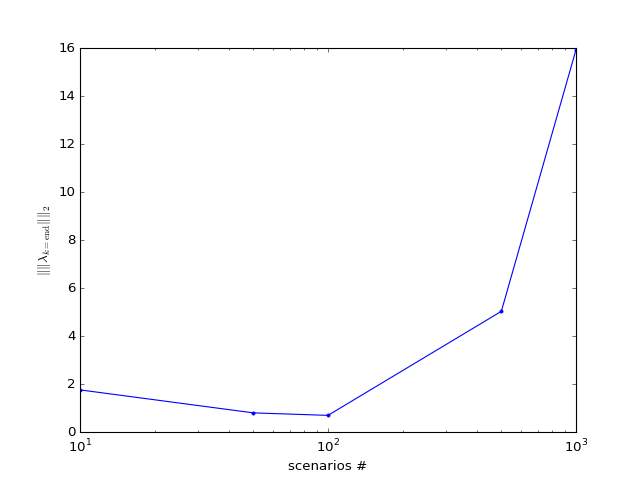

C:\Miniconda2\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [14]:
plt.figure(facecolor='w')
plt.semilogx(n_S_exp, [np.linalg.norm(logger.lambda_k_iterates[-1],2) for logger in method_loggers], '.-')

plt.xlabel('scenarios #')
plt.ylabel('$\| \lambda_{k=\mathrm{end}} \|_2$')
plt.legend()

<IPython.core.display.Javascript object>


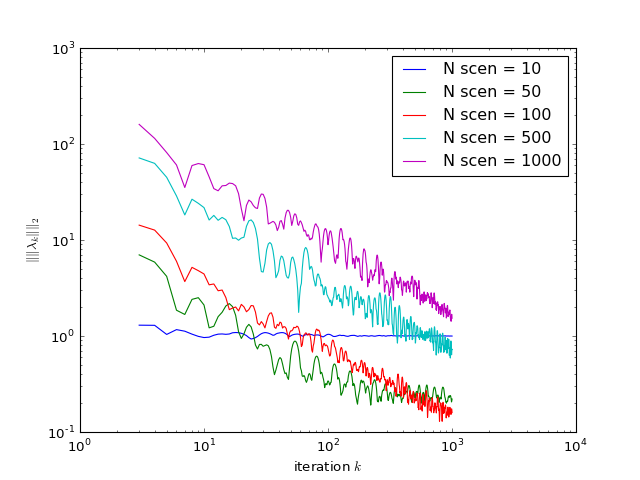

In [15]:
plt.figure(facecolor='w')
for logger_ix, logger in enumerate(method_loggers):
    plt.loglog([call+1 for call in logger.oracle_calls], [np.linalg.norm(iterate,np.inf) for iterate in logger.lambda_k_iterates], label='N scen = {}'.format(n_S_exp[logger_ix]))

plt.xlabel('iteration $k$')
plt.ylabel('$\| \lambda_{k} \|_2$')
plt.legend()

# Generate Caroe & Schultz Datasets

In [5]:
# desired number of scenarios
# n_S_exp = [10, 50, 100, 500, 1000, 5000, 10000]
n_S_exp = [10, 50, 100, 500, 1000]

In [3]:
for n_S in n_S_exp:
    generate_caroe_schultz_cor_file(n_S=n_S)
    generate_caroe_schultz_sto_and_tim_files(n_S=n_S)

WindowsError: [Error 183] Cannot create a file when that file already exists

In [4]:
# Uppber Bound on d(0):
3.0/2.0*5+20+16+19+23+28

113.5